In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import mne

from GigascienceDataset import SubjectData

# # Make sure ipympl is installed (via pip) for interactive plots in Jupyter 
# %matplotlib widget

In [3]:
s01 = SubjectData('s01.mat')

Creating RawArray with float64 data, n_channels=69, n_times=358400
    Range : 0 ... 358399 =      0.000 ...   699.998 secs
Ready.
Creating RawArray with float64 data, n_channels=69, n_times=358400
    Range : 0 ... 358399 =      0.000 ...   699.998 secs
Ready.
Creating RawArray with float64 data, n_channels=69, n_times=71680
    Range : 0 ... 71679 =      0.000 ...   139.998 secs
Ready.
Creating RawArray with float64 data, n_channels=69, n_times=71680
    Range : 0 ... 71679 =      0.000 ...   139.998 secs
Ready.
Creating RawArray with float64 data, n_channels=68, n_times=34048
    Range : 0 ... 34047 =      0.000 ...    66.498 secs
Ready.
Creating RawArray with float64 data, n_channels=68, n_times=5120
    Range : 0 ... 5119 =      0.000 ...     9.998 secs
Ready.
Creating RawArray with float64 data, n_channels=68, n_times=5120
    Range : 0 ... 5119 =      0.000 ...     9.998 secs
Ready.
Creating RawArray with float64 data, n_channels=68, n_times=5120
    Range : 0 ... 5119 =      0.

100 events found
Event IDs: [1]
[[ 1023     0     1]
 [ 4607     0     1]
 [ 8191     0     1]
 [11775     0     1]
 [15359     0     1]]


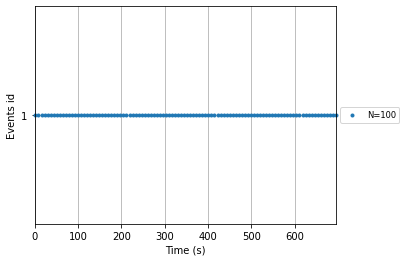

Not setting metadata
Not setting metadata
100 matching events found
Applying baseline correction (mode: mean)
0 projection items activated


In [4]:
events = mne.find_events(s01.raw_imagery_left, stim_channel=s01.stim_channel)
print(events[:5])
fig = mne.viz.plot_events(events, sfreq=s01.mat_srate, first_samp=s01.raw_imagery_left.first_samp)
reject_criteria = {'eeg': -40e-6}       # 250 µV The default from the overview tutorial
im_left_epochs = mne.Epochs(s01.raw_imagery_left, events, tmin=-0.2, tmax=2)#, reject=reject_criteria)

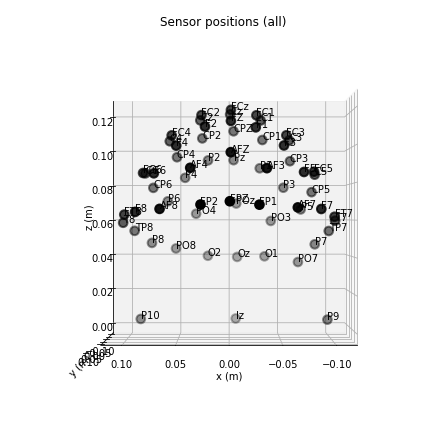

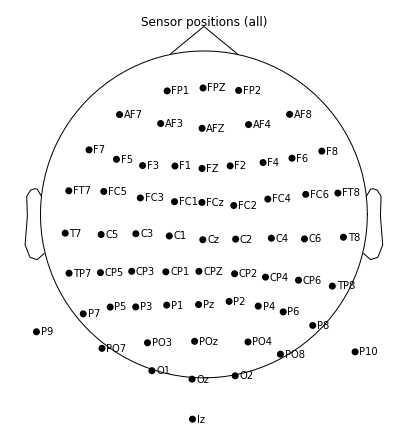

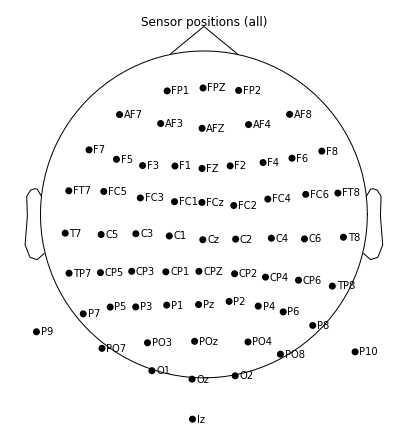

In [5]:
im_left_epochs.plot_sensors(kind='3d', ch_type='all', show_names=True)
im_left_epochs.plot_sensors(kind='topomap', ch_type='all', show_names=True)

Loading data for 100 events and 1127 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


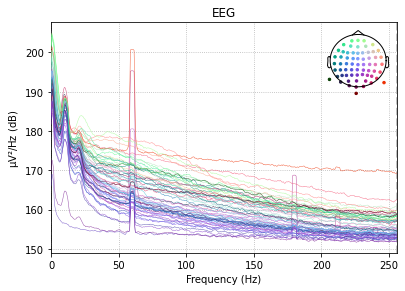

Loading data for 100 events and 1127 original time points ...
Not setting metadata
Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


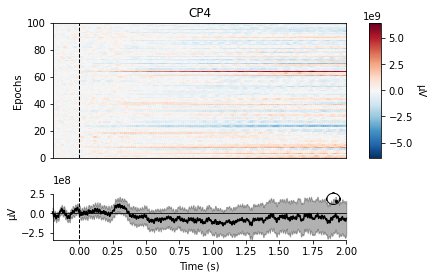

[<Figure size 432x288 with 4 Axes>]

In [6]:
im_left_epochs.plot_psd()
im_left_epochs.plot_image(picks=s01.channel_names[s01.channel_names.index('CP4')])

Fitting ICA to data using 64 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Loading data for 100 events and 1127 original time points ...
Selecting by number: 64 components
Loading data for 100 events and 1127 original time points ...
Fitting ICA took 33.8s.
Loading data for 100 events and 1127 original time points ...


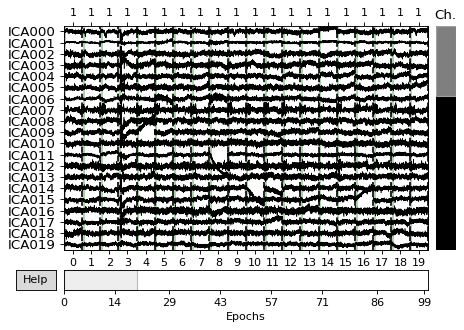

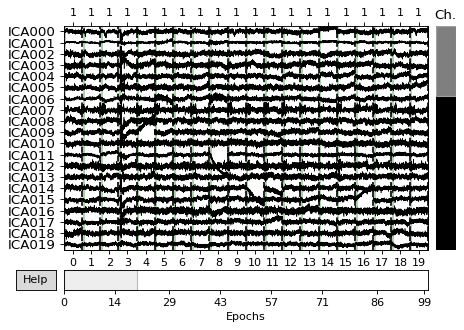

In [7]:
ica = mne.preprocessing.ICA(n_components=64, random_state=97, max_iter=800)
ica.fit(im_left_epochs)
# ica.plot_properties(raw)
ica.plot_sources(im_left_epochs)

In [8]:
ica = mne.preprocessing.ICA(n_components=20, random_state=97, max_iter=800)
ica.fit(raw)
# ica.plot_properties(raw)
ica.plot_sources(raw)

NameError: name 'raw' is not defined